# Deviance Residual

### it is the squareroot of residula deviance of each data point between proposed model and saturated model

### It is use to calculate to outlier int the logistic regression model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# likely hood array
rand_proposed=np.array([1.8,3.1,3.2]) # has two mean 
rand_saturated=np.array([3.3,3.3,3.3]) # has 3 mean 

In [32]:
residual_deviance_statistics=2*(np.log(rand_saturated)-np.log(rand_proposed))
residual_deviance_dof=2*(3-2)
residual_deviance_statistics

array([1.21227161, 0.12504071, 0.06154332])

In [11]:
statistics,pvalue=stats.chisquare(residual_deviance_statistics,ddof=residual_deviance_dof)

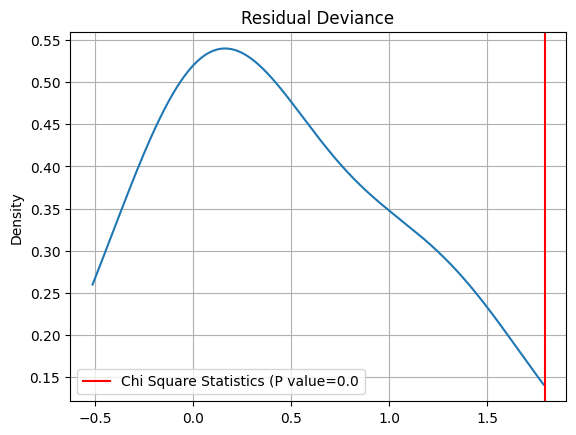

In [21]:
s1=pd.Series(residual_deviance_statistics)
s1.plot.density()
plt.axvline(statistics,color='red',label=f'Chi Square Statistics (P value={pvalue}')
plt.title('Residual Deviance')
plt.legend(loc='lower left')
plt.grid()
plt.show()

### Deviance Residual

In [22]:
deviance_residual=[]
for i in range(3):
    deviance_residual.append(np.sqrt(2*(np.log(rand_saturated[i])-np.log(rand_proposed[i]))))

In [23]:
deviance_residual

[np.float64(1.1010320645379184),
 np.float64(0.3536109641437436),
 np.float64(0.24807925615316442)]

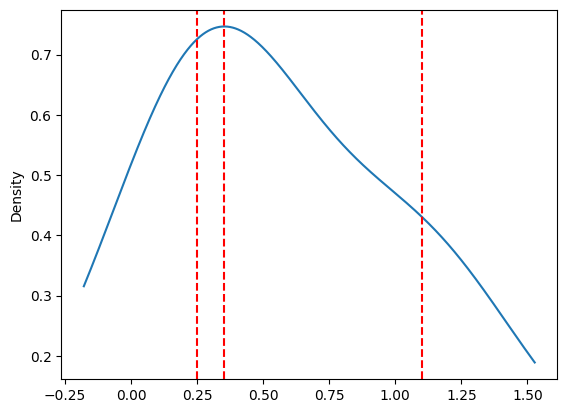

In [29]:
s2=pd.Series(deviance_residual)
s2.plot.density()
for i in range(3):
    plt.axvline(deviance_residual[i],color='red',linestyle='--')


### Squaring and adding deviance residual give residual deviance

In [30]:
residual_deviance_converted=[]
for i in range(3):
    residual_deviance_converted.append((deviance_residual[i])**2)

In [31]:
residual_deviance_converted

[np.float64(1.2122716071406308),
 np.float64(0.12504071396266792),
 np.float64(0.06154331733350737)]

### Applying to logistic regression to get outlier


In [80]:
import statsmodels.api as sm
X = pd.DataFrame({'x1': [2, 4, 6, 8, 10, 12]})
y = pd.Series([0, 1, 0, 1, 1, 1])

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X).fit(disp=False)

# Predicted probabilities
y_pred_prob = model.predict(X)

In [81]:
y_pred_prob

0    0.164470
1    0.382092
2    0.660155
3    0.859198
4    0.950420
5    0.983665
dtype: float64

<Axes: >

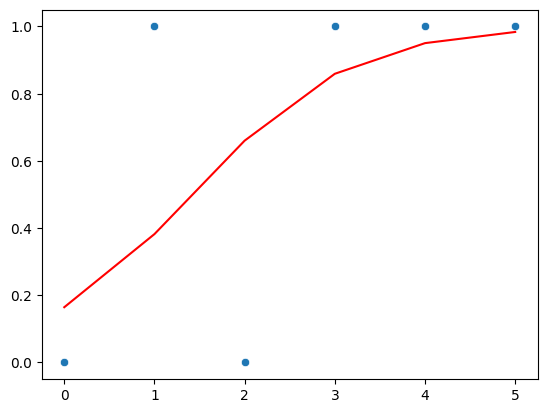

In [82]:
fig,ax=plt.subplots(1,1)
sns.scatterplot(y,ax=ax)
sns.lineplot(y_pred_prob,color='red',ax=ax)

In [83]:
# combined formula for deviance residual
residuals = np.sign(y - y_pred_prob) * np.sqrt(
    -2 * (y * np.log(y_pred_prob) + (1 - y) * np.log(1 - y_pred_prob))
)


In [84]:
residuals # deviance residual for ueach point

0   -0.599481
1    1.387150
2   -1.469194
3    0.550919
4    0.318910
5    0.181494
dtype: float64

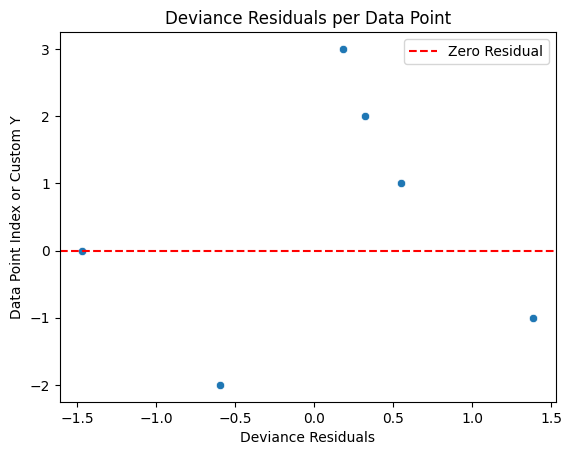

In [85]:

sns.scatterplot(x=residuals, y=[-2,-1,0,1,2,3])
plt.xlabel("Deviance Residuals")
plt.ylabel("Data Point Index or Custom Y")
plt.title("Deviance Residuals per Data Point")
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.legend()
plt.show()

In [87]:
y_positions = np.array([-2, -1, 0, 1, 2, 3])

# Find the index of max absolute residual
outlier_index = np.argmax(np.abs(residuals))  # return the maximum positive index -> which is outlier
print("Outlier index:", outlier_index)
print("Y label:", y_positions[outlier_index])
print("Residual:", residuals[outlier_index])

Outlier index: 2
Y label: 0
Residual: -1.4691940494347322


### here the outlier are at point 2 hope fully let change to opposite value and again do it 

In [76]:
import statsmodels.api as sm
X = pd.DataFrame({'x1': [2, 4, 6, 8, 10, 12]})
y = pd.Series([1, 0, 0, 1, 1, 0])

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X).fit(disp=False)

# Predicted probabilities
y_pred_prob = model.predict(X)

In [77]:
y_pred_prob

0    0.571335
1    0.542988
2    0.514361
3    0.485639
4    0.457012
5    0.428665
dtype: float64

In [78]:
# combined formula for deviance residual
residuals = np.sign(y - y_pred_prob) * np.sqrt(
    -2 * (y * np.log(y_pred_prob) + (1 - y) * np.log(1 - y_pred_prob))
)
residuals

0    1.058093
1   -1.251436
2   -1.201907
3    1.201907
4    1.251436
5   -1.058093
dtype: float64

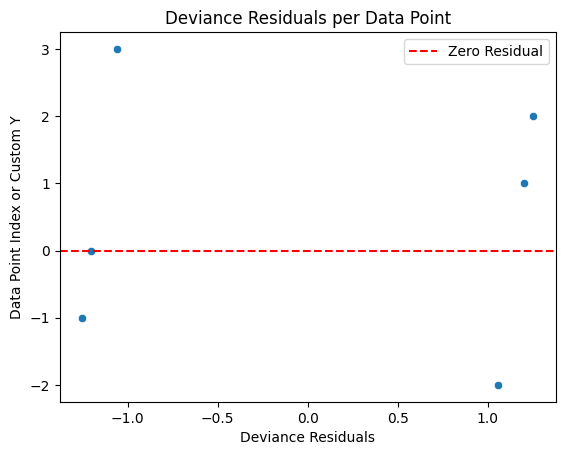

In [79]:
sns.scatterplot(x=residuals, y=[-2,-1,0,1,2,3])
plt.xlabel("Deviance Residuals")
plt.ylabel("Data Point Index or Custom Y")
plt.title("Deviance Residuals per Data Point")
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.legend()
plt.show()